### Explore driver data

In [1]:
import xarray as xr
import os
import math
import pandas as pd

In [7]:
path = '/glade/scratch/adamhb/my_subset_data/CZ2_wrf_1950_1980/CLM1PT_data'
files = sorted(os.listdir(path))

In [8]:
full_paths = [os.path.join(path, fname) for fname in files]
#d = fix_time(xr.open_dataset(path + "/"+files[0])

In [9]:
d = xr.open_mfdataset(full_paths)

In [11]:
d

<xarray.Dataset>
Dimensions:   (time: 262800, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time      (time) object 1950-09-01 00:30:00.000054 ... 1980-08-31 23:29:5...
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/15)
    LONGXY    (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    PSRF      (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    TBOT      (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    QBOT      (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    ...        ...
    ZBOT      (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    RH        (time, lat, lon) float32 dask.array<chunksize=(720, 1, 1), meta=np.ndarray>
    EDGEN     (time, scalar) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
    EDGES     (time, scalar) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
    EDGEE     (time, scalar) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
    EDGEW     (time, scalar) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
Attributes:
    title:           Meteorological forcing for California state, U.S.(Sep 1950)
    version:         v1-1
    date_created:    2023-04-10 00:59:56UTC
    source_code:     WRF-CLM-forcing.R
    code_notes:      Meteorological drivers compatible with ELM-FATES and CLM...
    code_developer:  Xinulin Gao <xiulingao@lbl.gov>
    file_author:     Xiulin Gao <xiulingao@lbl.gov>
    data_provider:   Stefan Rahimi <s.rahimi@ucla.edu>
    usage_notes:      If you plan to use these data for any scientific analys...

In [10]:
list(d.keys())

['LONGXY',
 'LATIXY',
 'PSRF',
 'TBOT',
 'QBOT',
 'WIND',
 'FSDS',
 'PRECTmms',
 'FLDS',
 'ZBOT',
 'RH',
 'EDGEN',
 'EDGES',
 'EDGEE',
 'EDGEW']

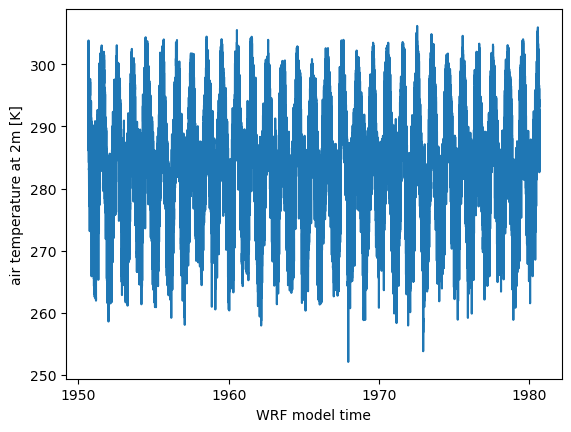

In [12]:
d.TBOT.plot()

### Define lat and long of target location

In [7]:
CZ2_lat = 37.0311
CZ2_lon = 240.7434 - 360

-119.25659999999999


### Find wrf grid cell closest to point

In [16]:
def dist_func(a,b):
    return math.sqrt(a**2 + b**2)

def getDiff(d,var,target,r,c):
    return abs(d[var][0,r,c].values - target)

output = {'lat':[],'lon':[],'dist':[]}
for r in range(d.LATIXY.shape[1]):
    for c in range(d.LATIXY.shape[2]):
                           
        lon_diff = getDiff(d,'LONGXY',CZ2_lon,r,c)
        lat_diff = getDiff(d,'LATIXY',CZ2_lat,r,c)
        dist = dist_func(lon_diff, lat_diff)
        output['lat'].append(r)
        output['lon'].append(c)
        output['dist'].append(dist)

#### Find min distance

In [17]:
output = pd.DataFrame(output)
output.dist.min()

0.05056802114443564

#### Get indices of min distance

In [18]:
output.loc[output.dist == 0.05056802114443564]

,lat,lon,dist
10952,74,74,0.050568


#### Get lat/lon of closest grid cell

In [22]:
print(d.LONGXY[0,74,74].values)
print(d.LATIXY[0,74,74].values)

-119.226456
37.0717


### Get precip at CZ2 wrf cell

In [6]:
d.PRECTmms

<xarray.DataArray 'PRECTmms' (time: 26280, lat: 1, lon: 1)>
dask.array<concatenate, shape=(26280, 1, 1), dtype=float32, chunksize=(744, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1985-02-01 00:30:00.000054 ... 1988-01-31 23:29:59...
Dimensions without coordinates: lat, lon
Attributes:
    units:      mm/s
    long_name:  precipitation rate
    mode:       time-dependent

### Plot annual precip totals

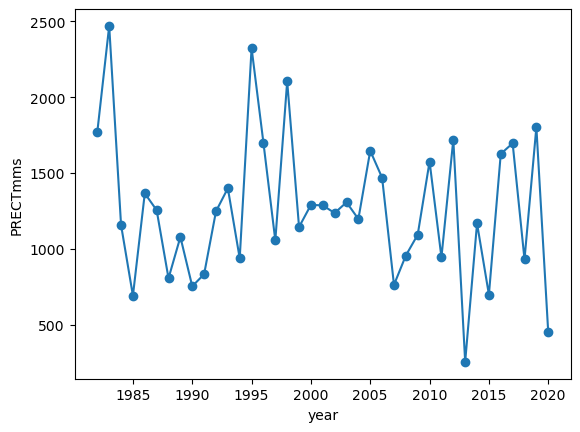

In [23]:
hourly_precip = d.PRECTmms * 3600
annual_precip = hourly_precip.groupby(d.time.dt.year).sum()
annual_precip.plot(marker = "o")

### Plot mean monthly precipitation

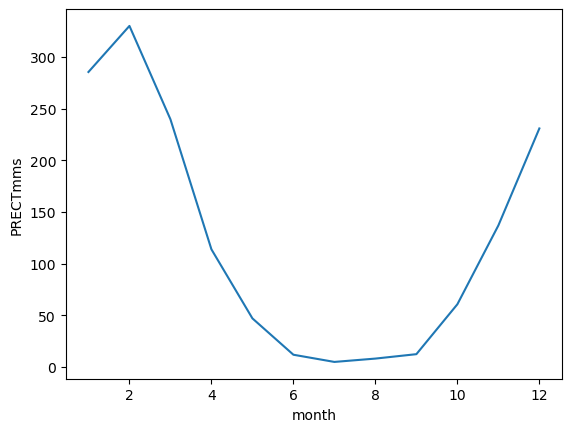

In [35]:
#hourly_precip.groupby(d.time.dt.year).sum().plot()

mean_precip_rate_per_month = d.PRECTmms.groupby(d.time.dt.month).mean() * 30.4 * 24 * 3600
mean_precip_rate_per_month.plot()

### Plot temp

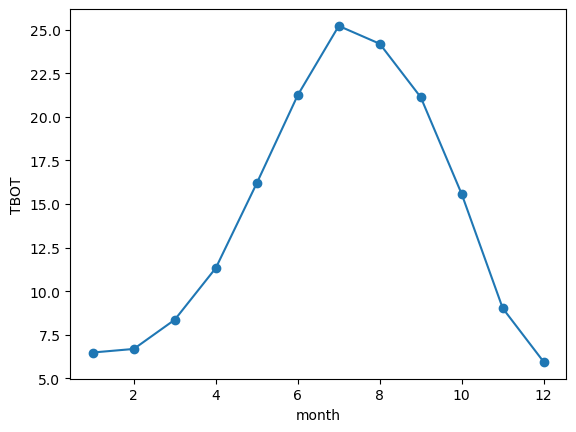

In [24]:
temp_CZ2 = d.TBOT - 273
temp_CZ2.groupby(d.time.dt.month).mean().plot(marker = "o")

### Temp by month

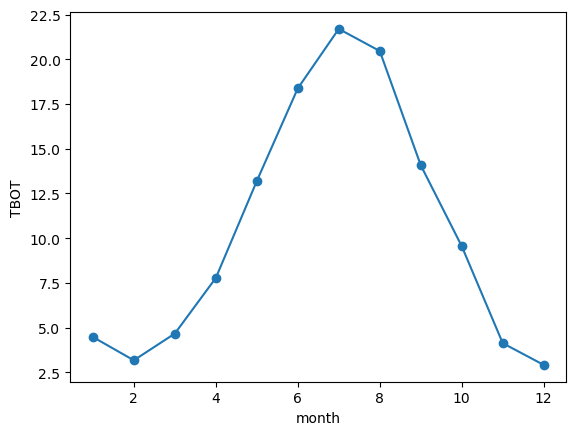

In [35]:
temp_monthly = temp_CZ2.groupby(d.time.dt.month).mean()
temp_monthly.plot(marker = "o")